<a href="https://colab.research.google.com/github/IslamAlam/Introduction2SAR/blob/master/Execrise_2_InSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **InSAR Interferometry**


In [4]:
import subprocess

repo_url = "https://github.com/IslamAlam/Introduction2SAR.git"

# Wrapper to print out command
def call(command):
    print("Executing: "+command)
    return subprocess.call(command, shell=True)

call("git clone " + repo_url)
import sys
base_folder = "./Introduction2SAR/"

sys.path.append(base_folder)

Executing: git clone https://github.com/IslamAlam/Introduction2SAR.git


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft 
from matplotlib.colors import LogNorm
from scipy import signal
# from helper import open_dat_file

import struct

# Configure plot universal property
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['font.size'] = 16

%matplotlib inline

In [6]:
import glob
import scipy.io as sio

data_files = glob.glob(base_folder + './data/ex2/*.npy')
data_files = np.sort(data_files)

import load_binary as load

dfs = {}
for idx, f in enumerate(data_files, 1):
    print(idx, f)
    dfs[idx] = np.load(f)
    # print([f[:-4] +'.mat'])
    sio.savemat(str(f[:-4] +'.mat'), {'obj_arr':dfs[idx]})


1 ./Introduction2SAR/./data/ex2/i_xsar125141_bild1.npy
2 ./Introduction2SAR/./data/ex2/i_xsar125141_bild2.npy


In [15]:
# implement functions to convert SAR data from decibel units to linear units and back again
def decibel_to_linear(band):
     # convert to linear units
    return np.power(10,np.array(band)/10)

def linear_to_decibel(band):
    return 10*np.log10(band)

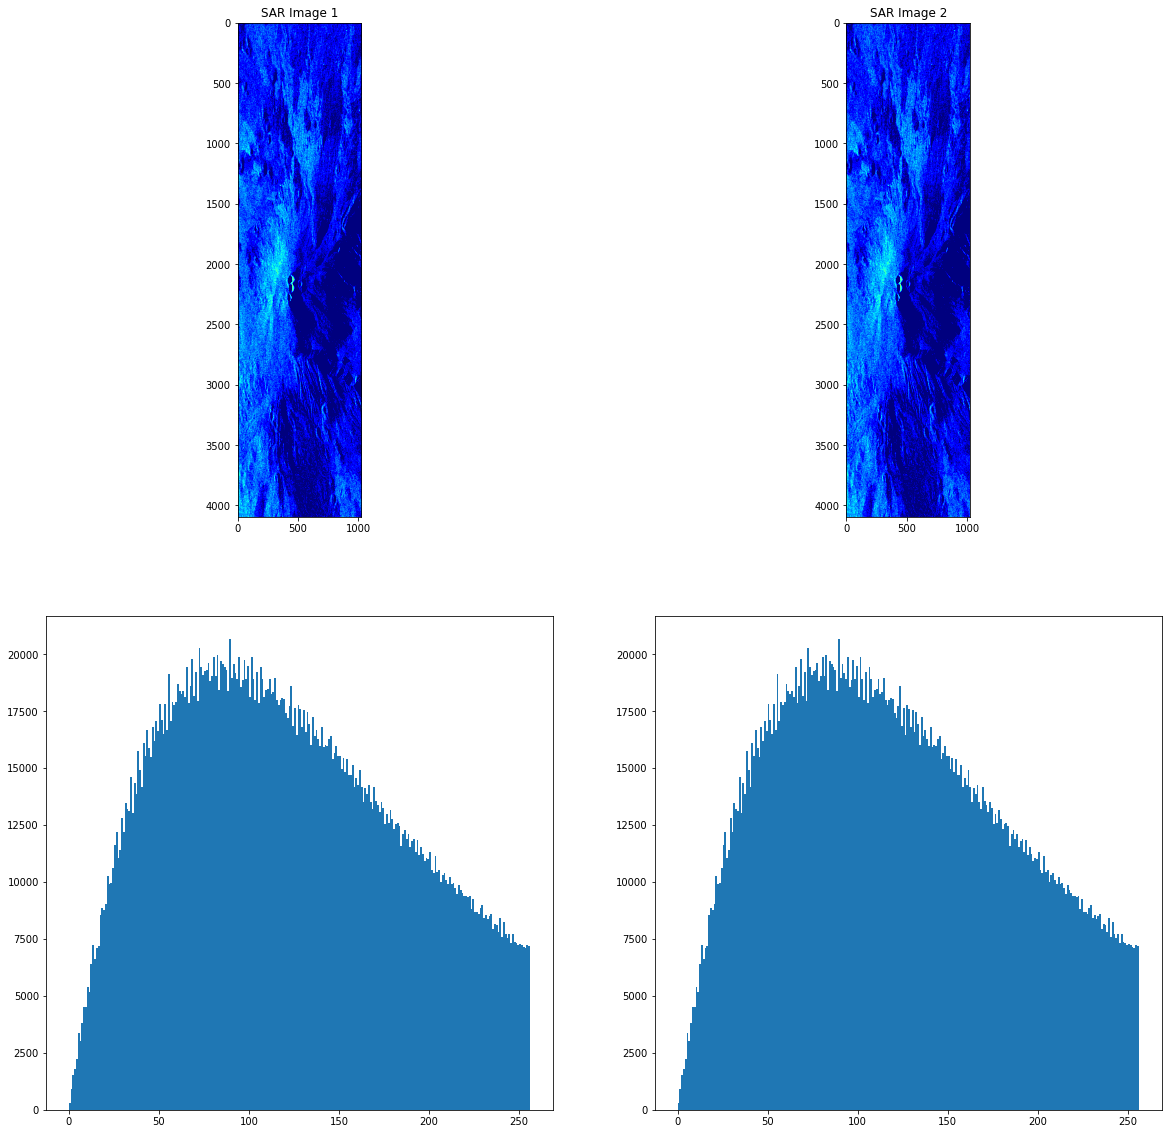

In [21]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
log_cmp = LogNorm(vmin=100, vmax=np.max(np.abs(dfs[1])))
ax1.imshow(np.absolute(dfs[1]), cmap='jet', norm=log_cmp)
ax1.set_title("SAR Image 1")

ax2 = fig.add_subplot(222)
log_cmp = LogNorm(vmin=100, vmax=np.max(np.abs(dfs[2])))
ax2.imshow(np.absolute(dfs[2]), cmap='jet', norm=log_cmp)
ax2.set_title("SAR Image 2")

ax3 = fig.add_subplot(223)

ax3.hist(np.absolute(dfs[1]).ravel(),256,[0,256])

ax4 = fig.add_subplot(224)

ax4.hist(np.absolute(dfs[2]).ravel(),256,[0,256])

plt.show()

In [ ]:
cor = signal.correlate2d(dfs[1], dfs[2])